# Convolutional Neural Network and MNIST

## Architecture:
INPUT -> CONV1 -> RELU1 -> POOL1 -> CONV2 -> RELU2 -> POOL2 -> FC1 -> FC2 (OUTPUT, SOFTMAX)

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import math

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
# defining hyperparameters
learning_rate = 0.1
num_epochs = 5000
batch_size = 100

In [0]:
# defining placeholders
x = tf.placeholder("float", shape = [None, 28, 28, 1])
y_ = tf.placeholder("float", shape = [None, 10])

### Define some helper functions


In [0]:
# padding = 1, strides = 1
def conv2d(x, w):
  return tf.nn.conv2d(input=x, filter=w, strides=[1,1,1,1], padding="SAME")

# padding = none, strides = 2, filter size = 2
# note that the pool layer isn't parameterized by weights
def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")

### Define the first Conv-Relu-Pool layers

In [0]:
w_conv1 = tf.Variable(tf.truncated_normal([3, 3, 1, 32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape = [32]))

In [7]:
h_conv1 = conv2d(x, w_conv1)
h_relu1 = tf.nn.relu(h_conv1)
h_pool1 = max_pool_2x2(h_relu1)

print(h_conv1)
print(h_relu1)
print(h_pool1)

Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("Relu:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)


### Define the second Conv-Relu-Pool layers

In [0]:
w_conv2 = tf.Variable(tf.truncated_normal([3, 3, 32, 64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))

In [9]:
h_conv2 = conv2d(h_pool1, w_conv2)
h_relu2 = tf.nn.relu(h_conv2)
h_pool2 = max_pool_2x2(h_relu2)

print(h_conv2)
print(h_relu2)
print(h_pool2)

Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("Relu_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)


### Define the first FC layer

In [10]:
fc_units1 = 1024
w_fc1 = tf.Variable(tf.truncated_normal([7*7*64, fc_units1], stddev=0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[fc_units1]))

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, w_fc1) + b_fc1)

print(h_fc1)

Tensor("Relu_2:0", shape=(?, 1024), dtype=float32)


### Define the Output Layer

Remember the output layer is returning the class probabilities (10 classes)

In [11]:
w_fc2 = tf.Variable(tf.truncated_normal([fc_units1, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))

logits = tf.matmul(h_fc1, w_fc2) + b_fc2

print(logits)

Tensor("add_1:0", shape=(?, 10), dtype=float32)


### Softmax! Lost Function! Optimization!

In [12]:
cross_entropy_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=logits))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy_loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



### Some metrics to track while training

In [0]:
correct_predictions = tf.equal(tf.argmax(logits, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

### Let's train our model

In [0]:
# initialize tensorflow variables
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [15]:
# run model
with tf.Session() as sess:
    sess.run(init)
    for i in range(num_epochs):
        x_batch, y_batch = mnist.train.next_batch(batch_size)
        x_batch = x_batch.reshape([batch_size, 28, 28, 1]) # we no longer want a flat vector of pixels
        optimizer.run(feed_dict = {x: x_batch, y_: y_batch})
        if i % 100 == 0:
            acc = accuracy.eval(feed_dict = {x: x_batch, y_: y_batch})
            loss = cross_entropy_loss.eval(feed_dict = {x: x_batch, y_: y_batch})
            print("Epoch: {}, accuracy: {}, loss: {}".format(i, acc, loss))

    acc = accuracy.eval(feed_dict = {x: mnist.test.images.reshape([-1, 28, 28, 1]), y_:mnist.test.labels}) # here too
    print("Test accuracy: {}".format(acc))
    saver.save(sess, "./saved_model.ckpt")

Epoch: 0, accuracy: 0.28999999165534973, loss: 2.991023063659668
Epoch: 100, accuracy: 1.0, loss: 0.057250846177339554
Epoch: 200, accuracy: 0.9900000095367432, loss: 0.04043462127447128
Epoch: 300, accuracy: 1.0, loss: 0.013961885124444962
Epoch: 400, accuracy: 0.9900000095367432, loss: 0.048914507031440735
Epoch: 500, accuracy: 1.0, loss: 0.0081412885338068
Epoch: 600, accuracy: 1.0, loss: 0.010748974978923798
Epoch: 700, accuracy: 1.0, loss: 0.015011988580226898
Epoch: 800, accuracy: 1.0, loss: 0.01861169934272766
Epoch: 900, accuracy: 0.9900000095367432, loss: 0.03372485935688019
Epoch: 1000, accuracy: 1.0, loss: 0.006531117483973503
Epoch: 1100, accuracy: 1.0, loss: 0.00835238117724657
Epoch: 1200, accuracy: 1.0, loss: 0.010753377340734005
Epoch: 1300, accuracy: 1.0, loss: 0.004388762637972832
Epoch: 1400, accuracy: 1.0, loss: 0.005036098416894674
Epoch: 1500, accuracy: 1.0, loss: 0.007550382055342197
Epoch: 1600, accuracy: 1.0, loss: 0.015122861601412296
Epoch: 1700, accuracy: 1.

### Print out some pictures like we did for the previous workshops

In [0]:
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    return plt

with tf.Session() as sess:
    saver.restore(sess, "./saved_model.ckpt")
    X_new_scaled = mnist.test.images
    z = logits.eval(feed_dict={x: X_new_scaled.reshape([-1, 28, 28, 1])})
    y_pred = np.argmax(z, axis=1)
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(accuracy.eval(feed_dict={x: mnist.test.images.reshape([-1, 28, 28, 1]), y_: mnist.test.labels}))
    for i in range(100):
        if i%3 == 0:
            gen_image(mnist.test.images[i]).show()
            print("Predition: ", y_pred[i])
            print("Actual label: ", np.argmax(mnist.test.labels[i]))

## Filter Visualization

Let's take a look at how our model "sees" the inputs we give.

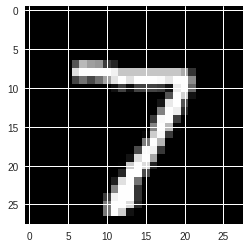

In [42]:
imageToUse = np.reshape(mnist.test.images[0], [28,28])
plt.imshow(imageToUse, interpolation="nearest", cmap="gray")

In [0]:
def getActivations(layer,stimuli, sess):
    units = sess.run(layer,feed_dict={x:np.reshape(stimuli,[1, 28,28,1])})
    plotNNFilter(units)

In [0]:
def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")

INFO:tensorflow:Restoring parameters from ./saved_model.ckpt


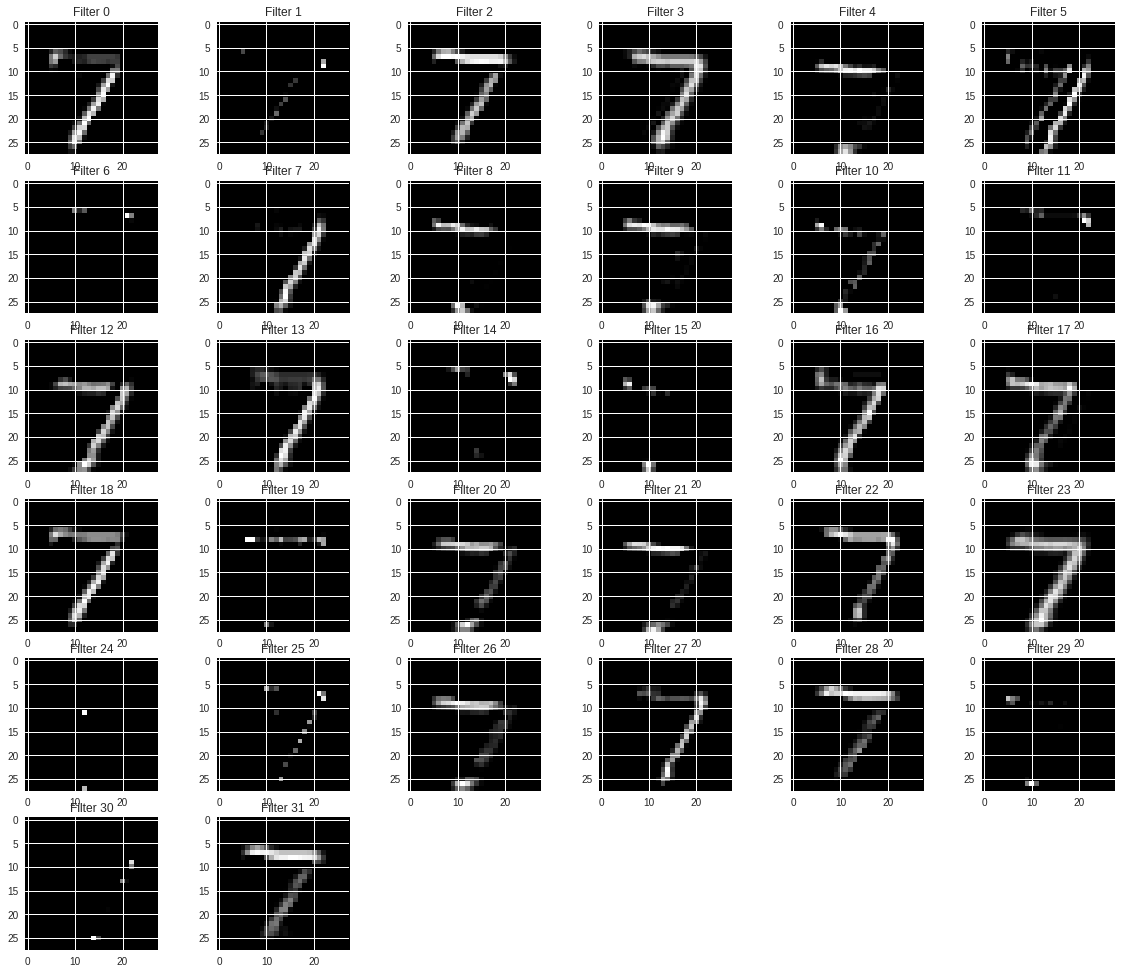

In [43]:
with tf.Session() as sess:
  saver.restore(sess, "./saved_model.ckpt")
  getActivations(h_relu1,imageToUse, sess)